###  Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats as stats
sns.color_palette()
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.2f}".format
# Label encoding target feature
from sklearn.model_selection import train_test_split

import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

### Loading Dataset

In [2]:
UNR_df = pd.read_csv('UNR-IDD.csv')

In [3]:
UNR_df.head(5)

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack


In [4]:
UNR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 non-null  int64 
 13  D

In [5]:
# Checking for duplicates
UNR_df[UNR_df.duplicated() == True]

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
32287,of:000000000000000a,Port#:3,66,9078,8992,63,56,0,0,0,...,0,0,True,0,4,201,123,-1,PortScan,Attack


In [6]:
# Missing values checking
UNR_df.isna().sum()

Switch ID                        0
Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Packets Rx Dropped               0
Packets Tx Dropped               0
Packets Rx Errors                0
Packets Tx Errors                0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Delta Packets Rx Dropped         0
 Delta Packets Tx Dropped        0
Delta Packets Rx Errors          0
Delta Packets Tx Errors          0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
is_valid                         0
Table ID                         0
Active Flow Entries 

In [7]:
# Converting object to categorical features
for i in UNR_df:
    if UNR_df[i].dtypes == 'object':
        UNR_df[i] = UNR_df[i].astype('category')

In [8]:
# Numerical columns
num_cols = list(UNR_df._get_numeric_data().columns)
num_cols

['Received Packets',
 'Received Bytes',
 'Sent Bytes',
 'Sent Packets',
 'Port alive Duration (S)',
 'Packets Rx Dropped',
 'Packets Tx Dropped',
 'Packets Rx Errors',
 'Packets Tx Errors',
 'Delta Received Packets',
 'Delta Received Bytes',
 'Delta Sent Bytes',
 'Delta Sent Packets',
 'Delta Port alive Duration (S)',
 'Delta Packets Rx Dropped',
 ' Delta Packets Tx Dropped',
 'Delta Packets Rx Errors',
 'Delta Packets Tx Errors',
 'Connection Point',
 'Total Load/Rate',
 'Total Load/Latest',
 'Unknown Load/Rate',
 'Unknown Load/Latest',
 'Latest bytes counter',
 'is_valid',
 'Table ID',
 'Active Flow Entries',
 'Packets Looked Up',
 'Packets Matched',
 'Max Size']

In [9]:
# Categorical columns
cat_cols = ['Label', 'Binary Label', 'Switch ID', 'Port Number']

In [10]:
# Printing unique values
for i in cat_cols:
    print(f'{i}: {UNR_df[i].nunique()}')

Label: 6
Binary Label: 2
Switch ID: 12
Port Number: 4


In [11]:
UNR_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Received Packets,37411.00,21618.90,65283.17,9.00,329.00,1170.00,3417.00,352772.00
Received Bytes,37411.00,26474909.81,37030440.61,786.00,91040.50,12630515.00,37832295.00,271592472.00
Sent Bytes,37411.00,24512120.64,34398760.73,5705.00,57759.50,12626576.00,31764427.00,239242994.00
Sent Packets,37411.00,33626.82,88792.97,41.00,347.00,1240.00,3968.00,421598.00
Port alive Duration (S),37411.00,911.10,982.11,26.00,136.00,259.00,1747.00,3317.00
Packets Rx Dropped,37411.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Packets Tx Dropped,37411.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Packets Rx Errors,37411.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Packets Tx Errors,37411.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Delta Received Packets,37411.00,194.96,1087.14,0.00,2.00,4.00,6.00,15695.00


## Exploratory Data Analysis

- Function: plotting numerical features

In [12]:
def histogram_boxplot(feature, figsize=(10,7), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='skyblue') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'green') if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='blue', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Univariate analysis (continuous numerical)

In [13]:
continuous_num_cols = ['Received Packets', 'Received Bytes',  'Sent Bytes',
            'Sent Packets', 'Port alive Duration (S)', 'Delta Received Packets',
            'Delta Received Bytes', 'Delta Sent Packets', 'Delta Sent Bytes', 'Delta Port alive Duration (S)',
            'Connection Point', 'Total Load/Rate', 'Total Load/Latest', 'Unknown Load/Rate',
            'Unknown Load/Latest', 'Latest bytes counter', 'Active Flow Entries',
            'Packets Looked Up', 'Packets Matched']

In [14]:
# Mean, Median and Mode
for i in continuous_num_cols:
    mean=UNR_df[i].mean()
    median=UNR_df[i].median()
    mode=UNR_df[i].tolist()[0]
    print(f'Feature: {i}, Mean: {mean}, Median: {median}, Mode: {mode}')

Feature: Received Packets, Mean: 21618.89716928176, Median: 1170.0, Mode: 132
Feature: Received Bytes, Mean: 26474909.81176659, Median: 12630515.0, Mode: 9181
Feature: Sent Bytes, Mean: 24512120.639009915, Median: 12626576.0, Mode: 6311853
Feature: Sent Packets, Mean: 33626.82400898132, Median: 1240.0, Mode: 238
Feature: Port alive Duration (S), Mean: 911.0964154927696, Median: 259.0, Mode: 46
Feature: Delta Received Packets, Mean: 194.95808719360616, Median: 4.0, Mode: 0
Feature: Delta Received Bytes, Mean: 342700.08059126994, Median: 556.0, Mode: 0
Feature: Delta Sent Packets, Mean: 178.0832642805592, Median: 4.0, Mode: 2
Feature: Delta Sent Bytes, Mean: 314512.5657694261, Median: 556.0, Mode: 280
Feature: Delta Port alive Duration (S), Mean: 4.842933896447569, Median: 5.0, Mode: 5
Feature: Connection Point, Mean: 2.4378391382213787, Median: 2.0, Mode: 1
Feature: Total Load/Rate, Mean: 19214.551361898906, Median: 0.0, Mode: 0
Feature: Total Load/Latest, Mean: 514559.6624254898, Media

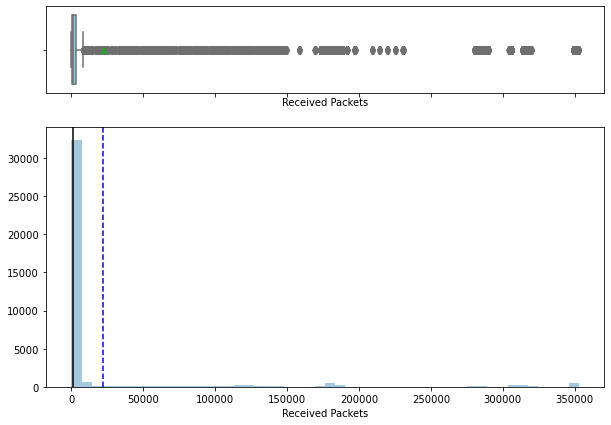

In [15]:
# Numerical continous analysis
histogram_boxplot(UNR_df['Received Packets'])

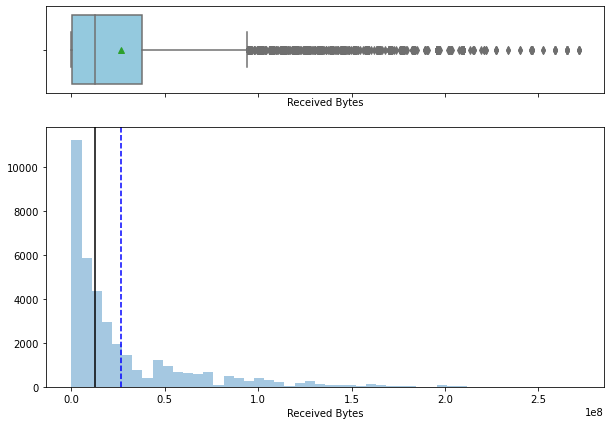

In [16]:
histogram_boxplot(UNR_df['Received Bytes'])

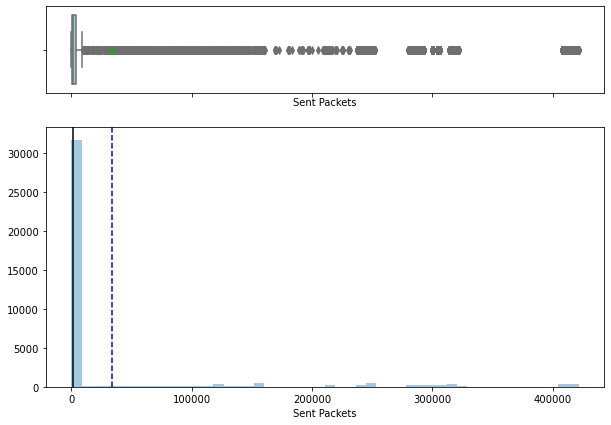

In [17]:
histogram_boxplot(UNR_df['Sent Packets'])

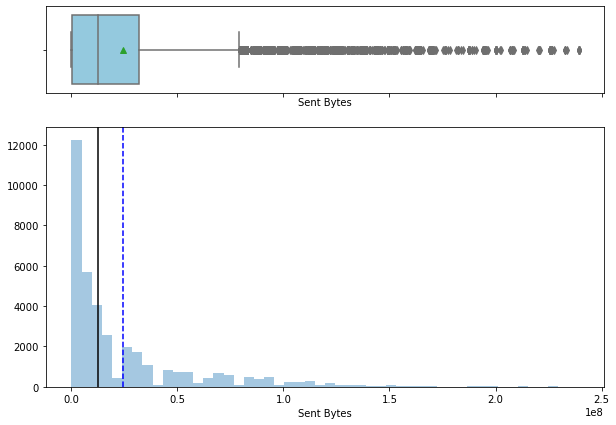

In [18]:
histogram_boxplot(UNR_df['Sent Bytes'])

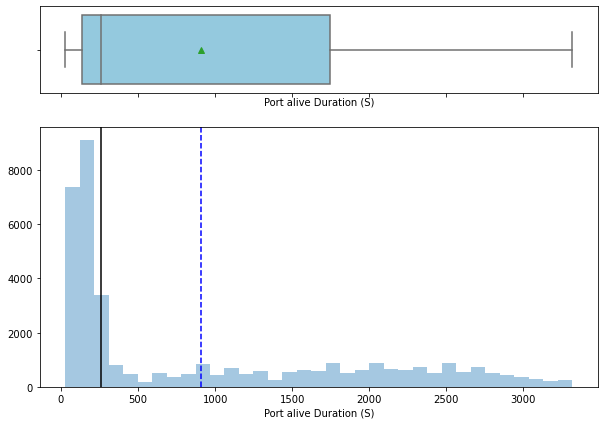

In [19]:
histogram_boxplot(UNR_df['Port alive Duration (S)'])

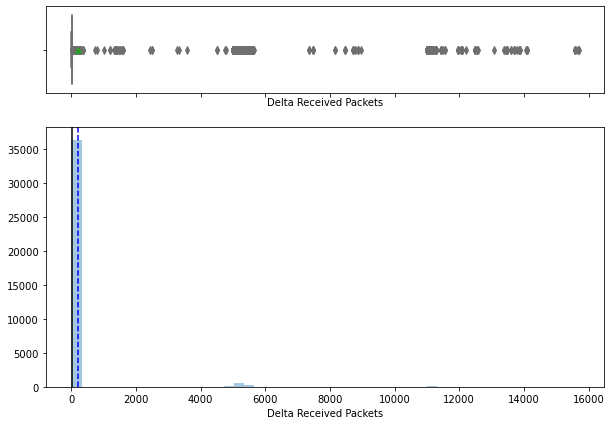

In [20]:
histogram_boxplot(UNR_df['Delta Received Packets'])

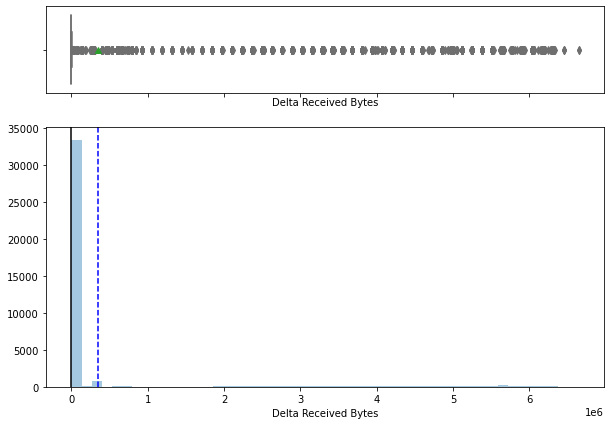

In [21]:
histogram_boxplot(UNR_df['Delta Received Bytes'])

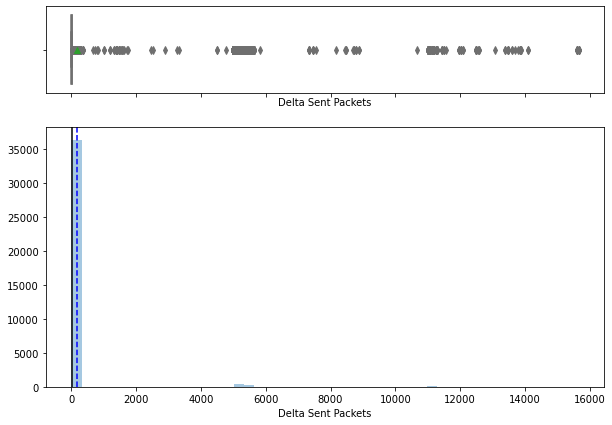

In [22]:
histogram_boxplot(UNR_df['Delta Sent Packets'])

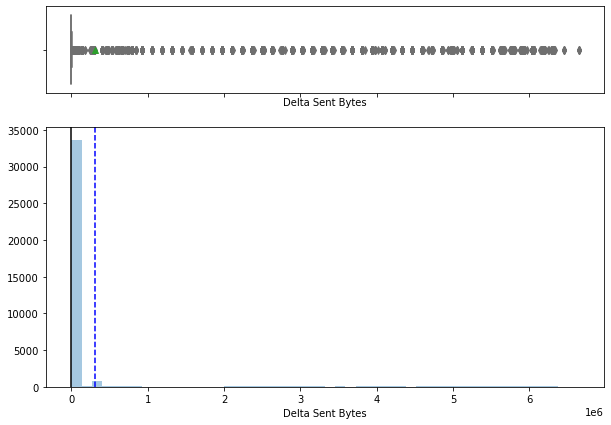

In [23]:
histogram_boxplot(UNR_df['Delta Sent Bytes'])

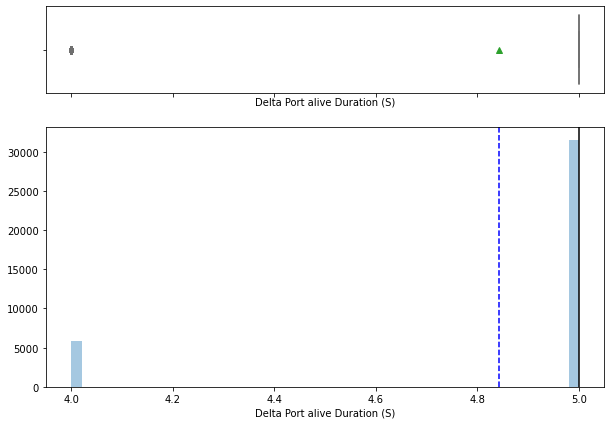

In [24]:
histogram_boxplot(UNR_df['Delta Port alive Duration (S)'])

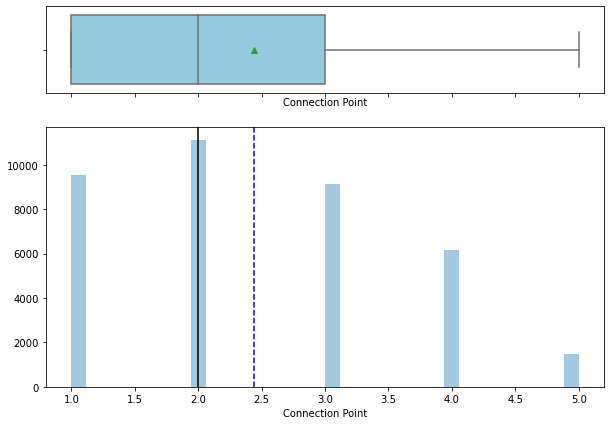

In [25]:
histogram_boxplot(UNR_df['Connection Point'])

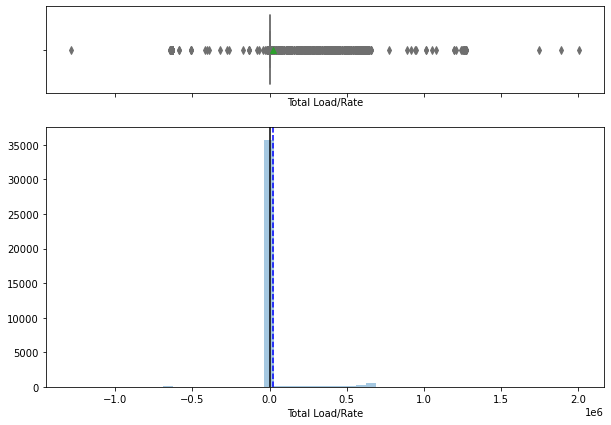

In [26]:
histogram_boxplot(UNR_df['Total Load/Rate'])

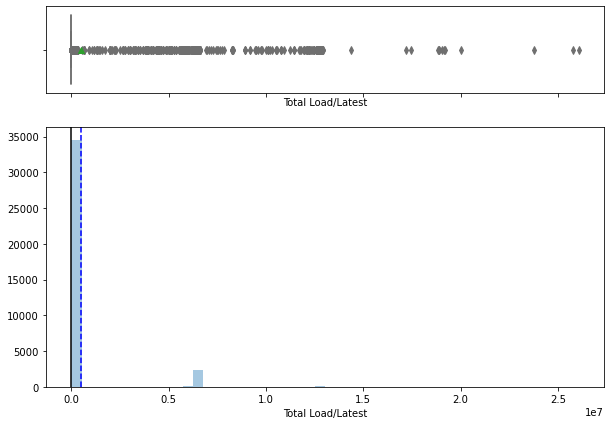

In [27]:
histogram_boxplot(UNR_df['Total Load/Latest'])

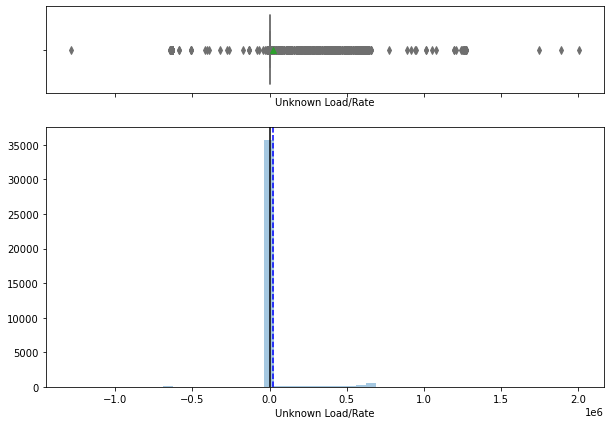

In [28]:
histogram_boxplot(UNR_df['Unknown Load/Rate'])

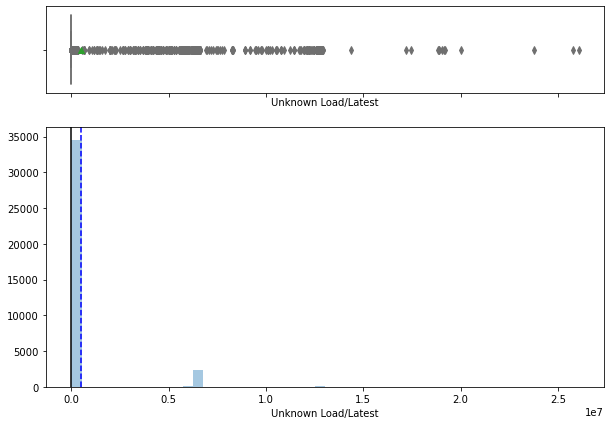

In [29]:
histogram_boxplot(UNR_df['Unknown Load/Latest'])

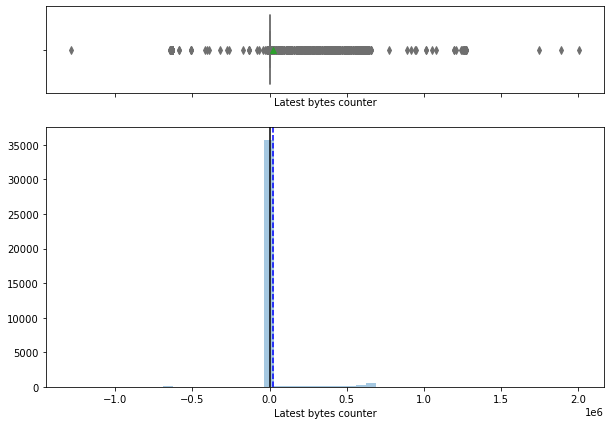

In [30]:
histogram_boxplot(UNR_df['Latest bytes counter'])

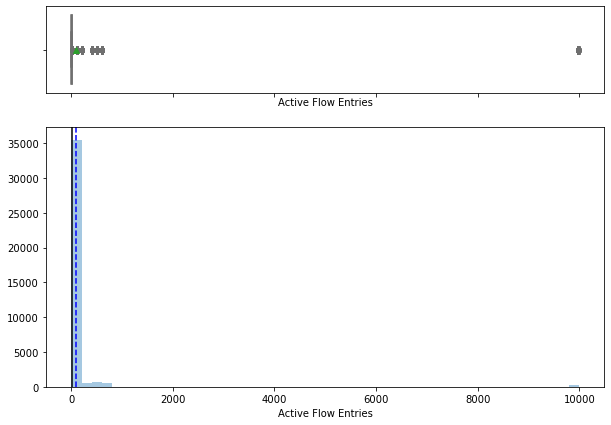

In [31]:
histogram_boxplot(UNR_df['Active Flow Entries'])

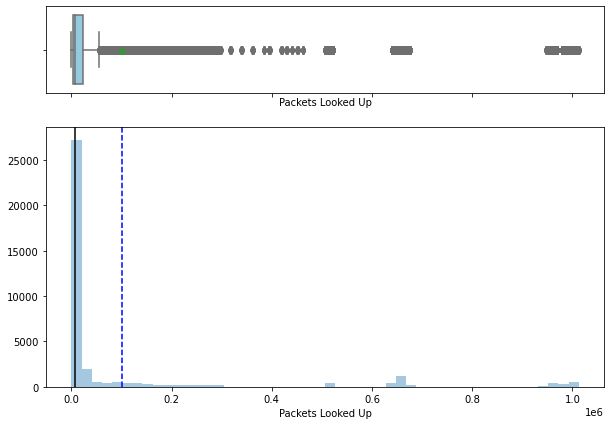

In [32]:
histogram_boxplot(UNR_df['Packets Looked Up'])

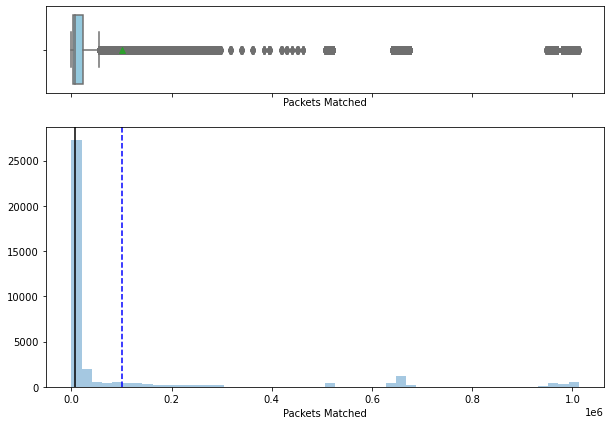

In [33]:
histogram_boxplot(UNR_df['Packets Matched'])

### Univariate analysis (discrete numerical)

In [34]:
# Numerical discrete columns
discrete_num_cols = list(set(num_cols) - set(continuous_num_cols))
discrete_num_cols

['Table ID',
 'Delta Packets Rx Errors',
 'Delta Packets Tx Errors',
 'Packets Tx Errors',
 'Packets Rx Errors',
 'is_valid',
 'Packets Rx Dropped',
 ' Delta Packets Tx Dropped',
 'Delta Packets Rx Dropped',
 'Packets Tx Dropped',
 'Max Size']

In [35]:
# Mean, Median and Mode
for i in discrete_num_cols:
    mean=UNR_df[i].mean()
    median=UNR_df[i].median()
    mode=UNR_df[i].tolist()[0]
    print(f'Feature: {i}, Mean: {mean}, Median: {median}, Mode: {mode}')

Feature: Table ID, Mean: 0.0, Median: 0.0, Mode: 0
Feature: Delta Packets Rx Errors, Mean: 0.0, Median: 0.0, Mode: 0
Feature: Delta Packets Tx Errors, Mean: 0.0, Median: 0.0, Mode: 0
Feature: Packets Tx Errors, Mean: 0.0, Median: 0.0, Mode: 0
Feature: Packets Rx Errors, Mean: 0.0, Median: 0.0, Mode: 0
Feature: is_valid, Mean: 1.0, Median: 1.0, Mode: True
Feature: Packets Rx Dropped, Mean: 0.0, Median: 0.0, Mode: 0
Feature:  Delta Packets Tx Dropped, Mean: 0.0, Median: 0.0, Mode: 0
Feature: Delta Packets Rx Dropped, Mean: 0.0, Median: 0.0, Mode: 0
Feature: Packets Tx Dropped, Mean: 0.0, Median: 0.0, Mode: 0
Feature: Max Size, Mean: -1.0, Median: -1.0, Mode: -1


We will probably drop above features 

### Univariate analysis for categorical features

In [36]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

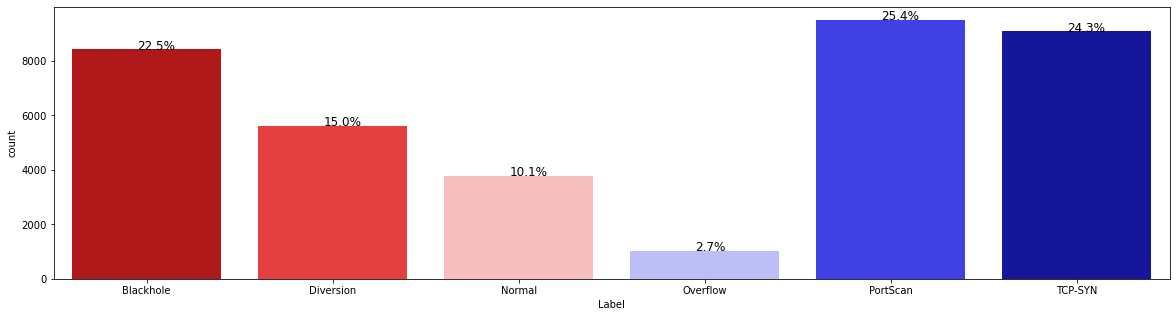

In [37]:
# 
plt.figure(figsize=(20,5))
ax = sns.countplot(UNR_df['Label'],palette='seismic_r')
perc_on_bar(ax,UNR_df['Label'])

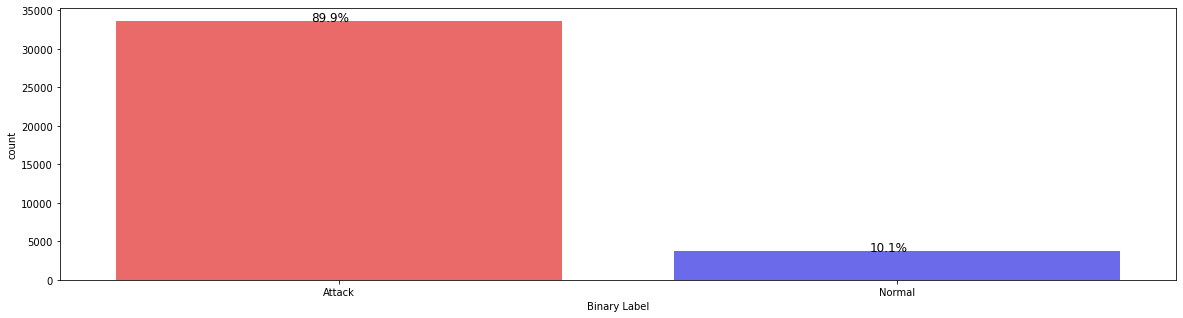

In [38]:
# 
plt.figure(figsize=(20,5))
ax = sns.countplot(UNR_df['Binary Label'],palette='seismic_r')
perc_on_bar(ax,UNR_df['Binary Label'])

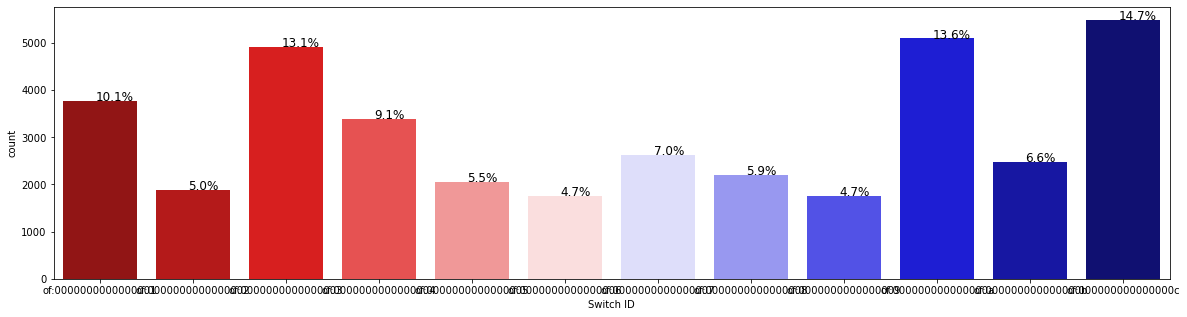

In [39]:
# 
plt.figure(figsize=(20,5))
ax = sns.countplot(UNR_df['Switch ID'],palette='seismic_r')
perc_on_bar(ax,UNR_df['Switch ID'])

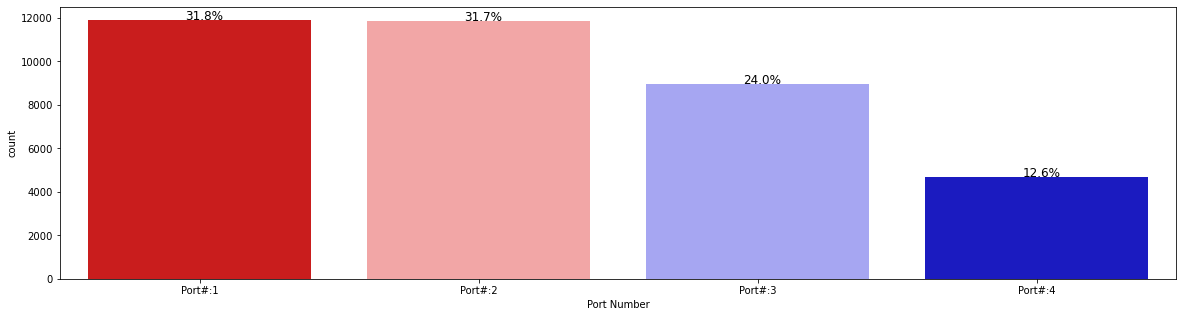

In [40]:
# 
plt.figure(figsize=(20,5))
ax = sns.countplot(UNR_df['Port Number'],palette='seismic_r')
perc_on_bar(ax,UNR_df['Port Number'])

### Bivariate analysis (categorical features)

In [41]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette='rocket_r')
    tab1 = pd.crosstab(x,UNR_df["Label"],margins=True)
    print(tab1)
    print('-'*120)
    tab2 = pd.crosstab(x,UNR_df["Label"],margins=True, normalize="index")
    print(tab2)
    print('-'*120)
    tab = pd.crosstab(x,UNR_df["Label"],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(15,4))
    total = len(x) # length of the column
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.xticks(rotation=0)
    plt.show()

Label        Blackhole  Diversion  Normal  Overflow  PortScan  TCP-SYN    All
Port Number                                                                  
Port#:1           2680       1792    1179       375      3000     2877  11903
Port#:2           2680       1792    1179       321      3000     2874  11846
Port#:3           2100       1115     709       207      2500     2330   8961
Port#:4            960        916     706       119      1000     1000   4701
All               8420       5615    3773      1022      9500     9081  37411
------------------------------------------------------------------------------------------------------------------------
Label        Blackhole  Diversion  Normal  Overflow  PortScan  TCP-SYN
Port Number                                                           
Port#:1           0.23       0.15    0.10      0.03      0.25     0.24
Port#:2           0.23       0.15    0.10      0.03      0.25     0.24
Port#:3           0.23       0.12    0.08      0.

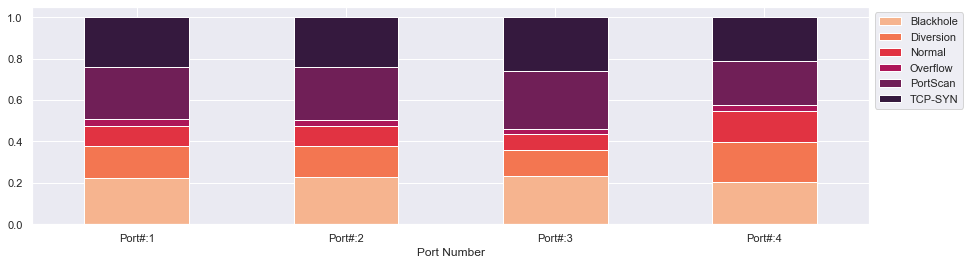

In [42]:
stacked_plot(UNR_df['Port Number'])

Label         Blackhole  Diversion  Normal  Overflow  PortScan  TCP-SYN    All
Binary Label                                                                  
Attack             8420       5615       0      1022      9500     9081  33638
Normal                0          0    3773         0         0        0   3773
All                8420       5615    3773      1022      9500     9081  37411
------------------------------------------------------------------------------------------------------------------------
Label         Blackhole  Diversion  Normal  Overflow  PortScan  TCP-SYN
Binary Label                                                           
Attack             0.25       0.17    0.00      0.03      0.28     0.27
Normal             0.00       0.00    1.00      0.00      0.00     0.00
All                0.23       0.15    0.10      0.03      0.25     0.24
------------------------------------------------------------------------------------------------------------------------


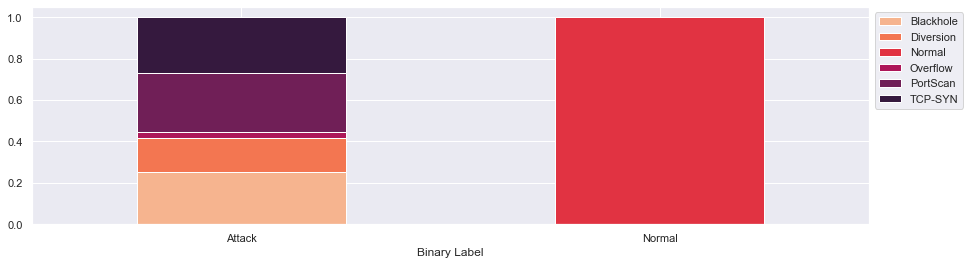

In [43]:
stacked_plot(UNR_df['Binary Label'])

### Bivariate Analysis

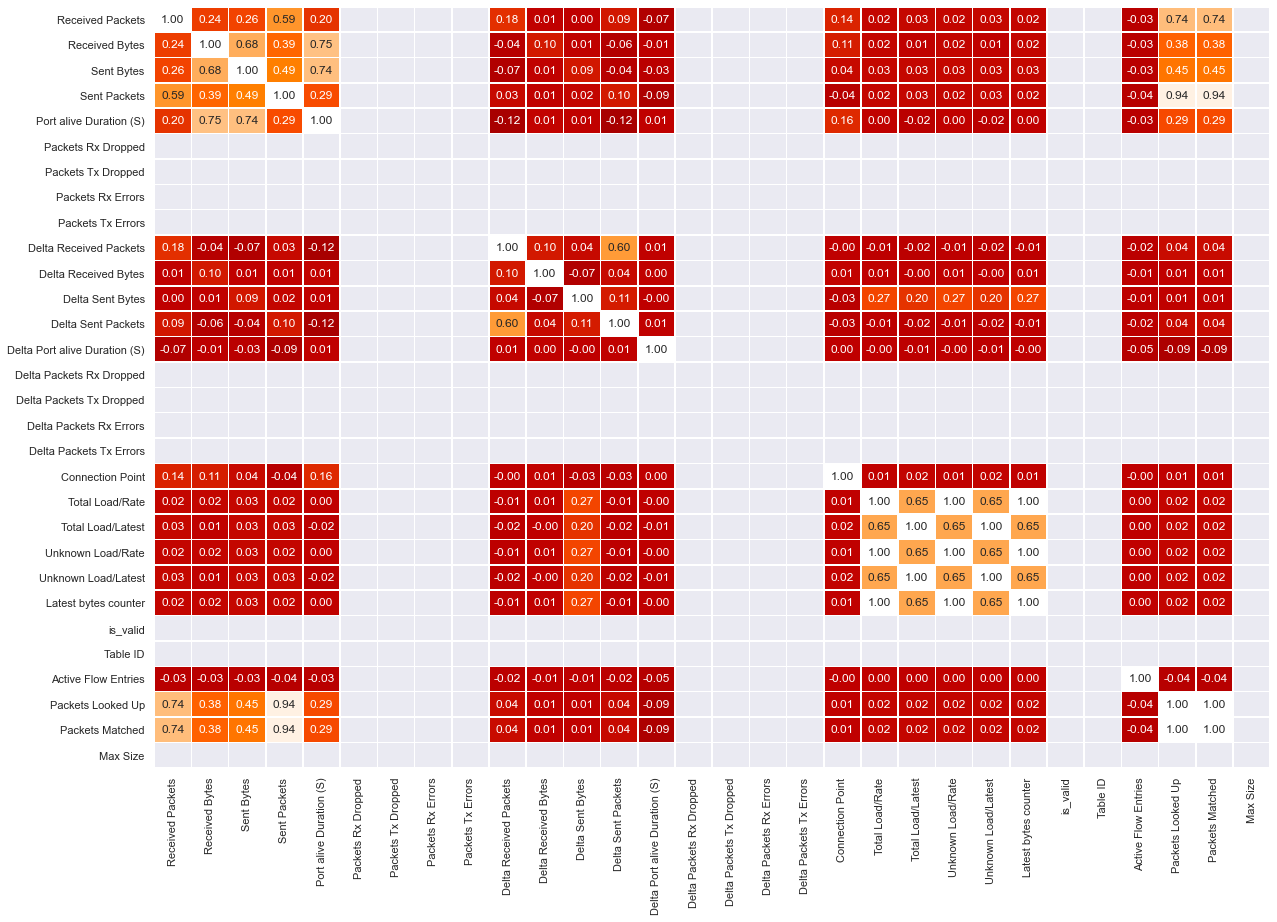

In [44]:
plt.figure(figsize=(20,14))

sns.heatmap(UNR_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="gist_heat",
            fmt='0.2f')            

plt.show()

**Comment:** Here we can see plenty of opportunity to drop features that won't impact much on our analysis. Some of them inclusive are filled with only zeros.


In [45]:
cleanned_df = UNR_df[['Switch ID',
                     'Port Number',
                     'Received Packets',
                     'Received Bytes',
                     'Sent Bytes',
                     'Sent Packets',
                     'Port alive Duration (S)',
                     'Delta Received Packets',
                     'Delta Received Bytes',
                     'Delta Sent Bytes',
                     'Delta Sent Packets',
                     'Delta Port alive Duration (S)',
                     'Connection Point',
                     'Total Load/Rate',
                     'Total Load/Latest',
                     'Unknown Load/Rate',
                     'Unknown Load/Latest',
                     'Latest bytes counter',
                     'Active Flow Entries',
                     'Packets Looked Up',
                     'Packets Matched',
                     'Label',
                     'Binary Label']]

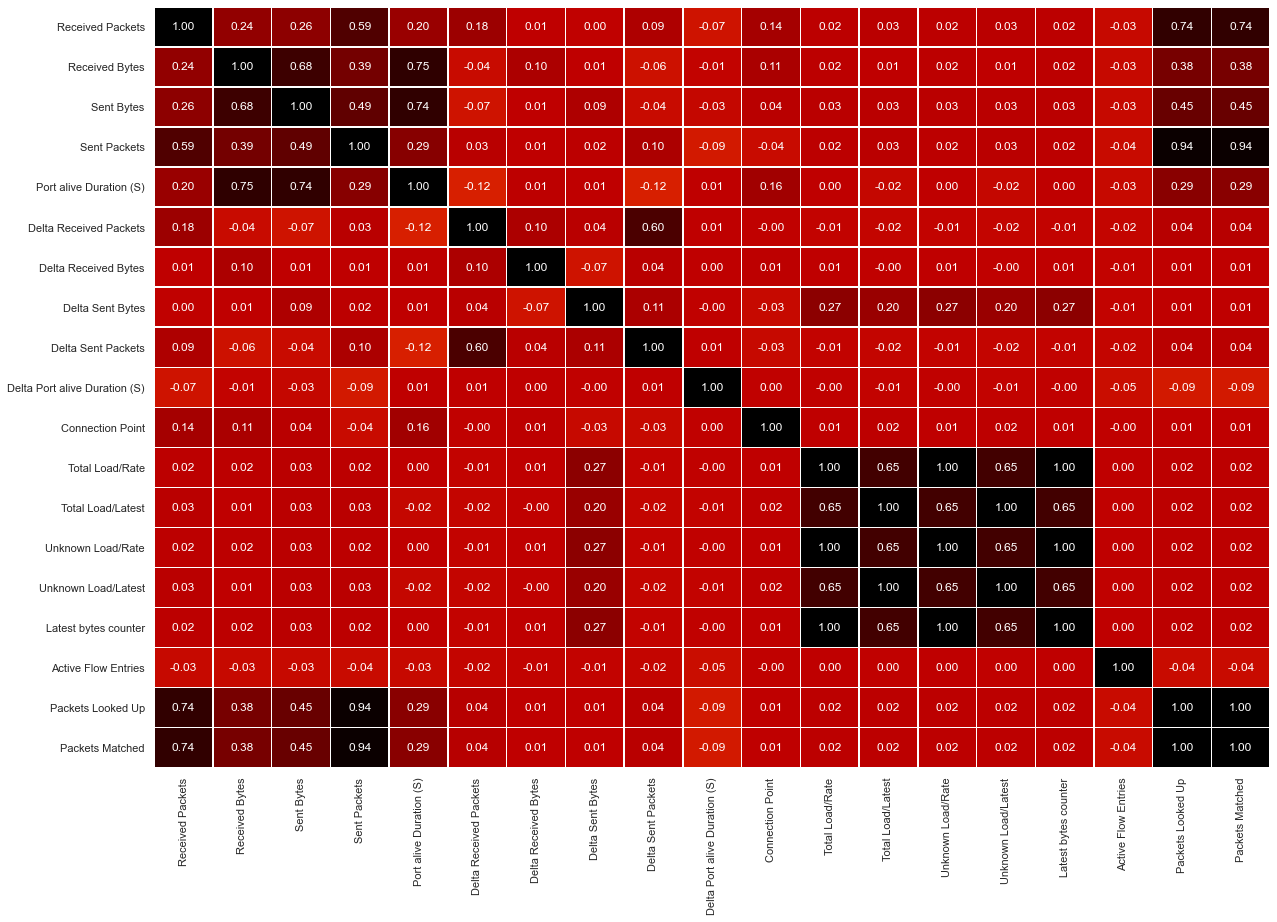

In [46]:
plt.figure(figsize=(20,14))

sns.heatmap(cleanned_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="gist_heat_r",
            fmt='0.2f')            

plt.show()

In [47]:
# Applying Chi-Square test over target feature Attition_Flag
for i in cat_cols:  
  crosstab = pd.crosstab(UNR_df['Label'],UNR_df[i])  

  Ho = "ProdTaken has --NO-- effect on " + i   # Stating the Null Hypothesis
  Ha = "ProdTaken has an effect on " + i   # Stating the Alternate Hypothesis

  chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

  if p_value < 0.05:  # Setting our significance level at 5%
      print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
  else:
      print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

ProdTaken has an effect on Label as the p_value (0.0) < 0.05
ProdTaken has an effect on Binary Label as the p_value (0.0) < 0.05
ProdTaken has an effect on Switch ID as the p_value (0.0) < 0.05
ProdTaken has an effect on Port Number as the p_value (0.0) < 0.05


In [48]:
# Saving data prior to Preparation
df_saved = UNR_df.copy()

In [49]:
# Preprocessing dataFrame
df_start = UNR_df.copy()

## Data Pre-processing

- Prepare data for modeling

In [50]:
# X has features but not target value
X_prep = df_start.drop('Label', axis=1)

# y only has target value
y_prep = df_start['Label']

In [51]:
# Transforming categorical features into dummies variables
X_prep_cat = pd.get_dummies(X_prep, drop_first=True)

In [52]:
le = preprocessing.LabelEncoder()
y_prep = le.fit_transform(y_prep)

In [53]:
y_prep

array([5, 5, 5, ..., 4, 4, 4])

In [54]:
print(X_prep_cat.shape)
print(y_prep.shape)

(37411, 45)
(37411,)


In [55]:
# Saving dataset prior to treat for outliers
X_saved = X_prep_cat
y_saved = y_prep

In [56]:
# First split in Train (0.80) vs. Test (0.20)
x_train,x_test,y_train,y_test=train_test_split(X_prep_cat, y_prep,test_size=0.365)

### Model building and evaluation

In [57]:
logistic_regression=LogisticRegression()
logistic_regression.fit(x_train,y_train)
pred=logistic_regression.predict(x_test)
abc=confusion_matrix(y_test,pred)
logistic_regression=logistic_regression.score(x_test,y_test)
print("The Classification report of logistic regression is : \n",classification_report(y_test,pred))

print('The score of logistic regression is ',logistic_regression*100)


The Classification report of logistic regression is : 
               precision    recall  f1-score   support

           0       0.31      0.19      0.24      3095
           1       0.28      0.75      0.41      2043
           2       0.31      0.90      0.46      1387
           3       0.00      0.00      0.00       360
           4       0.54      0.12      0.19      3472
           5       0.55      0.24      0.33      3299

    accuracy                           0.34     13656
   macro avg       0.33      0.37      0.27     13656
weighted avg       0.41      0.34      0.29     13656

The score of logistic regression is  33.50175746924429


In [58]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
knn_score=knn.score(x_test,y_test)
knn_confusion=confusion_matrix(y_test,pred)
print("The Classification report of KNN is : \n",classification_report(y_test,pred))
print('The KNN classification score is ',knn_score*100)

The Classification report of KNN is : 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      3095
           1       0.76      0.81      0.78      2043
           2       0.88      0.83      0.85      1387
           3       0.63      0.32      0.42       360
           4       0.78      0.78      0.78      3472
           5       0.79      0.79      0.79      3299

    accuracy                           0.79     13656
   macro avg       0.77      0.72      0.74     13656
weighted avg       0.79      0.79      0.78     13656

The KNN classification score is  78.63210310486232


In [59]:
d_tree=DecisionTreeClassifier(max_depth=8)
d_tree.fit(x_train,y_train)
pred_dtree=d_tree.predict(x_test)
dtre_pred=d_tree.score(x_test,y_test)
print("The Classification report of Decision Tree is : \n",classification_report(y_test,pred_dtree))
print('The Decision tree score is ',dtre_pred*100)

The Classification report of Decision Tree is : 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      3095
           1       0.85      0.74      0.79      2043
           2       1.00      1.00      1.00      1387
           3       0.87      0.38      0.52       360
           4       0.77      0.89      0.82      3472
           5       0.82      0.78      0.80      3299

    accuracy                           0.83     13656
   macro avg       0.86      0.78      0.80     13656
weighted avg       0.84      0.83      0.83     13656

The Decision tree score is  83.43585237258347
